In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df = pd.get_dummies(df,columns=['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


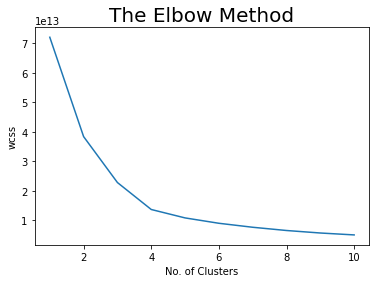

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(df)

In [9]:
y_means

array([3, 1, 1, ..., 0, 1, 2], dtype=int32)

In [10]:
np.unique(y_means)

array([0, 1, 2, 3, 4], dtype=int32)

In [11]:
df["y_means"]=y_means

In [12]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,y_means
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0,3
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1


In [13]:
df0=df[df["y_means"]==0]
df1=df[df["y_means"]==1]
df2=df[df["y_means"]==2]
df3=df[df["y_means"]==3]
df4=df[df["y_means"]==4]

In [14]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,y_means
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,655,0,46,7,137145.12,1,1,0,115146.40,1,0,1,0,1
9985,659,1,36,6,123841.49,2,1,0,96833.00,0,1,0,0,1
9991,597,0,53,4,88381.21,1,1,0,69384.71,1,1,0,0,1
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1


In [15]:
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,y_means
15,616,1,45,3,143129.41,2,0,1,64327.26,0,0,1,0,2
16,653,1,58,1,132602.88,1,1,0,5097.67,1,0,1,0,2
35,475,0,45,0,134264.04,1,1,0,27822.99,1,1,0,0,2
54,601,1,42,1,98495.72,1,1,0,40014.76,1,0,1,0,2
57,725,1,19,0,75888.20,1,0,0,45613.75,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,602,1,35,7,90602.42,2,1,1,51695.41,0,0,1,0,2
9986,673,1,47,1,183579.54,2,0,1,34047.54,0,0,1,0,2
9987,606,1,30,8,180307.73,2,1,1,1914.41,0,0,0,1,2
9993,644,1,28,7,155060.41,1,1,0,29179.52,0,1,0,0,2


In [16]:
df3

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,y_means
0,619,0,42,2,0.0,1,1,1,101348.88,1,1,0,0,3
13,549,0,25,5,0.0,2,0,0,190857.79,0,1,0,0,3
18,587,1,45,6,0.0,1,0,0,158684.81,0,0,0,1,3
20,732,1,41,8,0.0,2,1,1,170886.17,0,1,0,0,3
21,636,0,32,8,0.0,2,1,0,138555.46,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,611,1,27,7,0.0,2,1,1,157474.10,0,1,0,0,3
9983,613,1,40,4,0.0,1,0,0,151325.24,0,1,0,0,3
9989,841,1,28,4,0.0,2,1,1,179436.60,0,0,0,1,3
9992,726,1,36,2,0.0,1,1,0,195192.40,0,0,0,1,3


In [17]:
df4

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,y_means
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1,4
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0,1,0,4
31,533,1,36,7,85311.70,1,0,1,156731.91,0,1,0,0,4
39,582,1,41,6,70349.48,2,0,1,178074.04,0,0,1,0,4
41,465,0,51,8,122522.32,1,0,0,181297.65,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,623,1,48,5,118469.38,1,1,1,158590.25,0,1,0,0,4
9971,833,0,34,3,144751.81,1,0,0,166472.81,0,1,0,0,4
9972,758,1,26,4,155739.76,1,1,0,171552.02,0,1,0,0,4
9975,610,1,50,1,113957.01,2,1,0,196526.55,1,0,1,0,4
